<a href="https://colab.research.google.com/github/AG-2002/Customer-Segmentation-and-Prediction-of-Term-Deposit-Subscriptions-in-Bank-Marketing/blob/main/Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-additional-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [4]:
df=df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

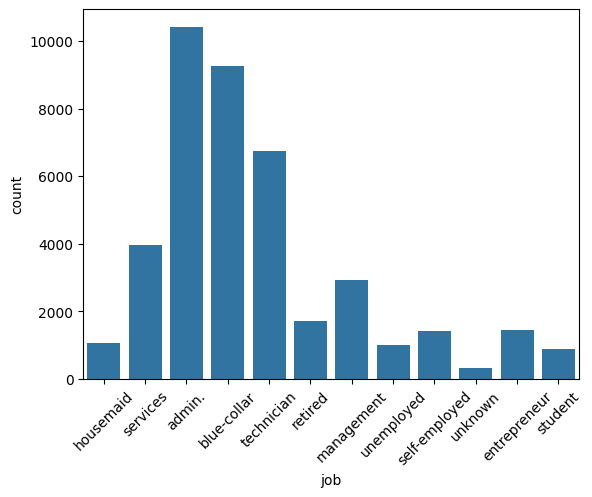

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)

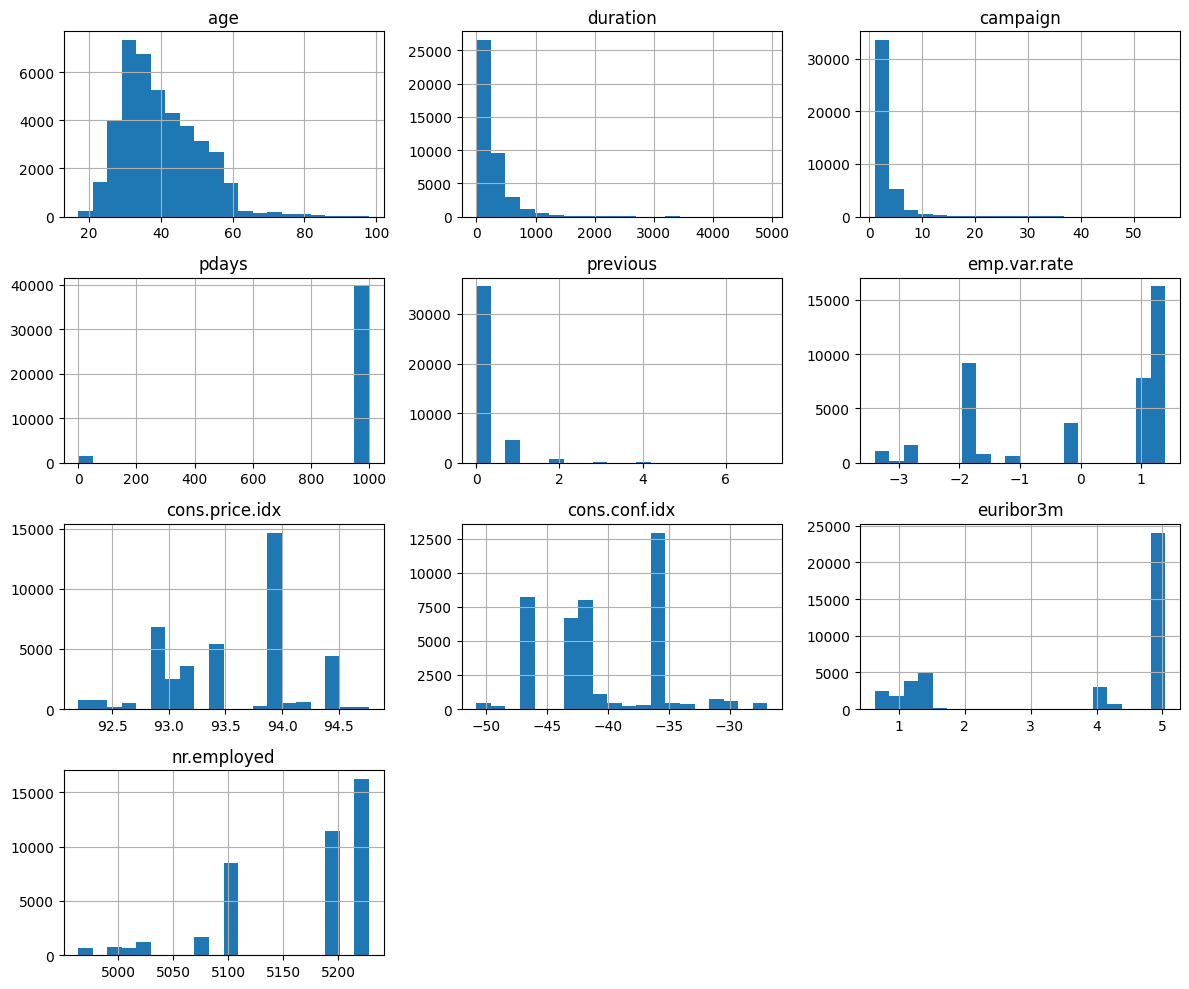

In [ ]:
# Histograms of all numeric columns
df.select_dtypes(include='number').hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

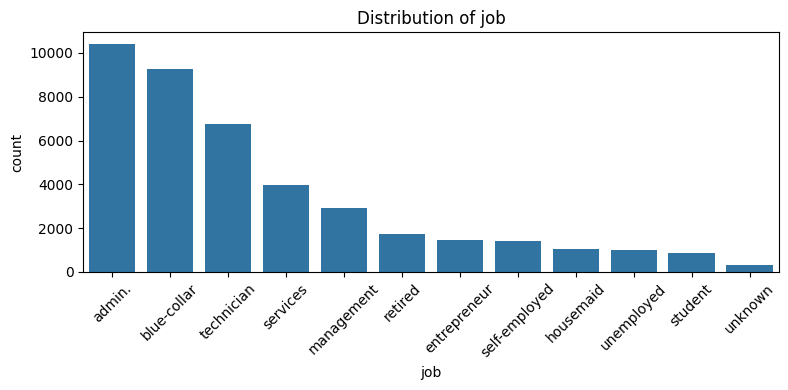

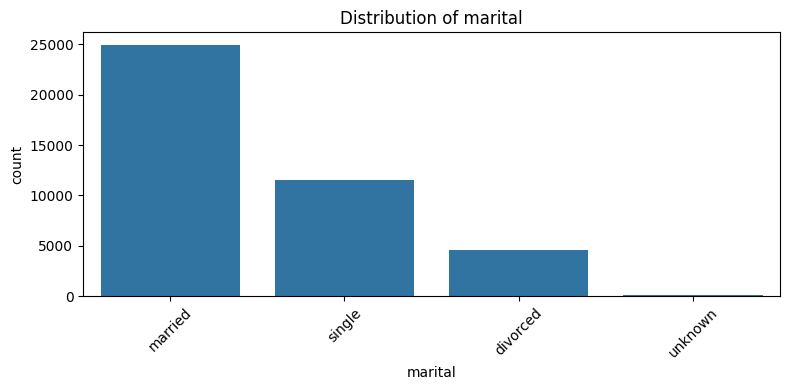

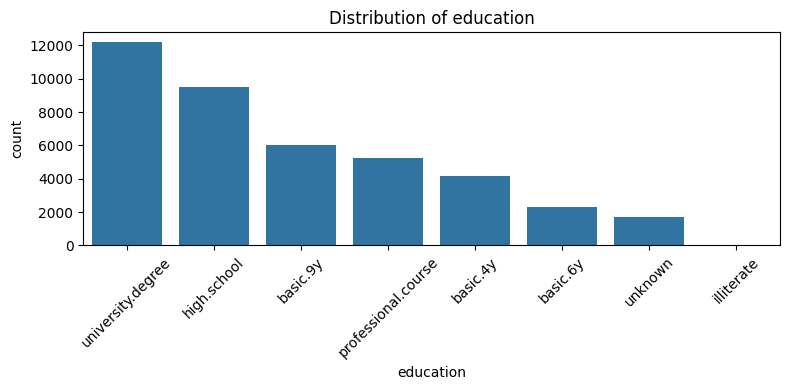

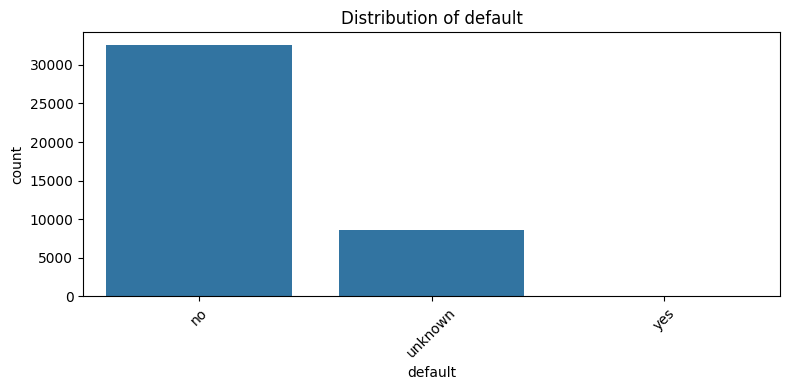

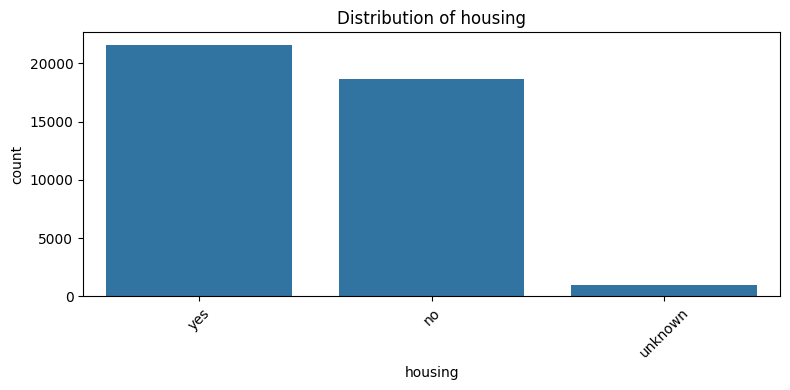

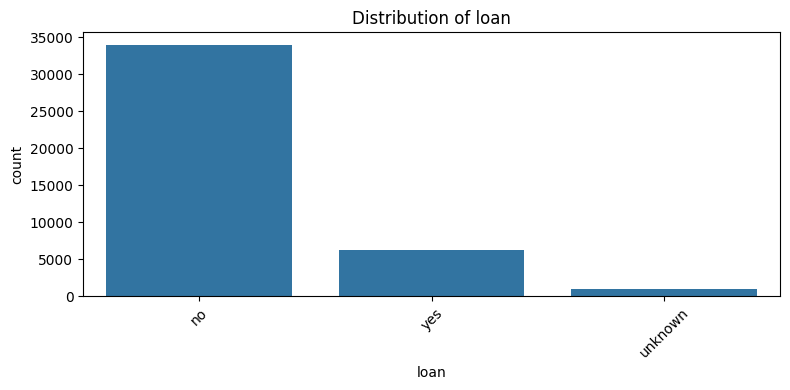

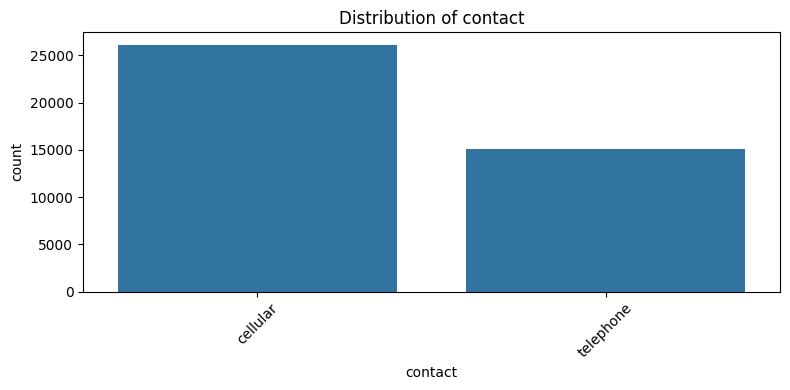

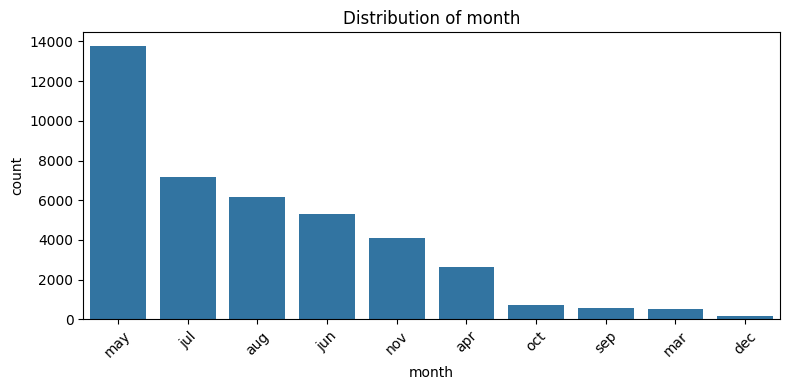

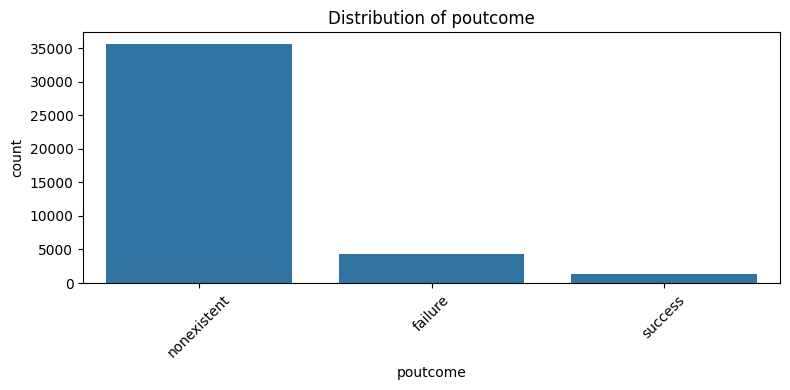

In [ ]:
# Distribution plots for categorical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

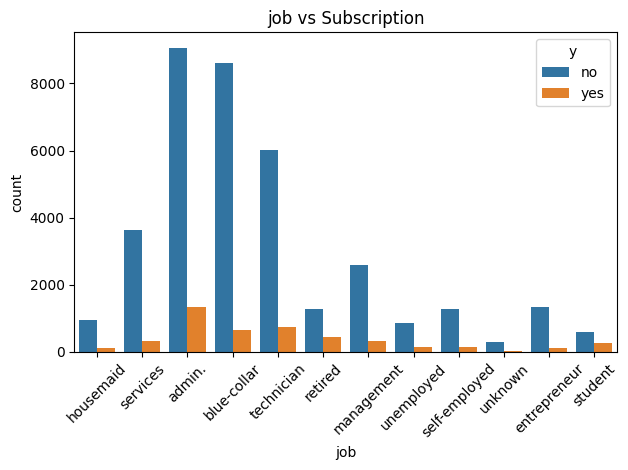

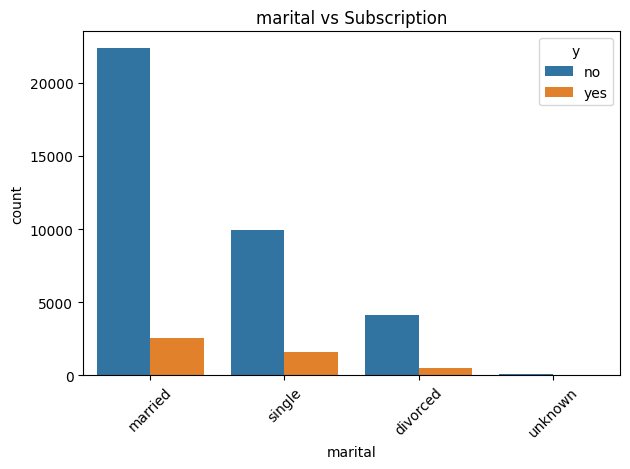

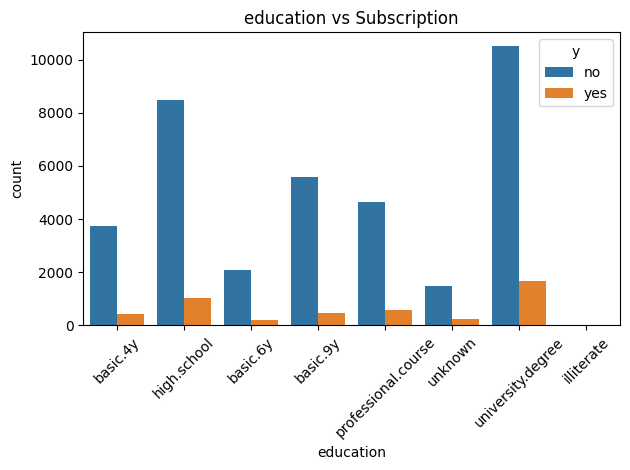

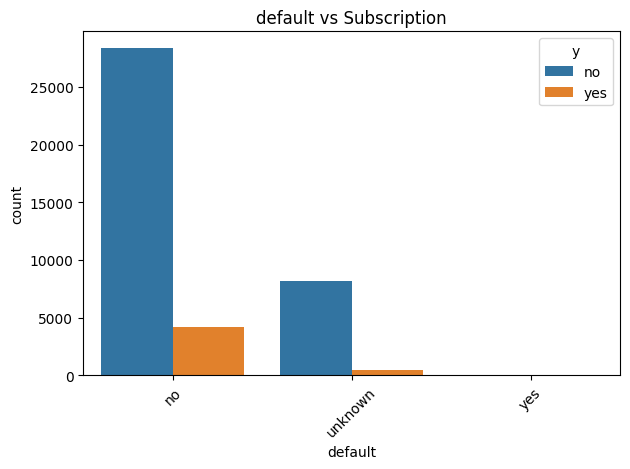

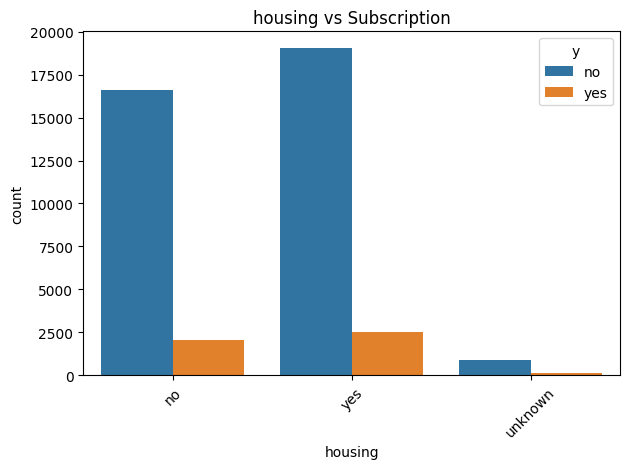

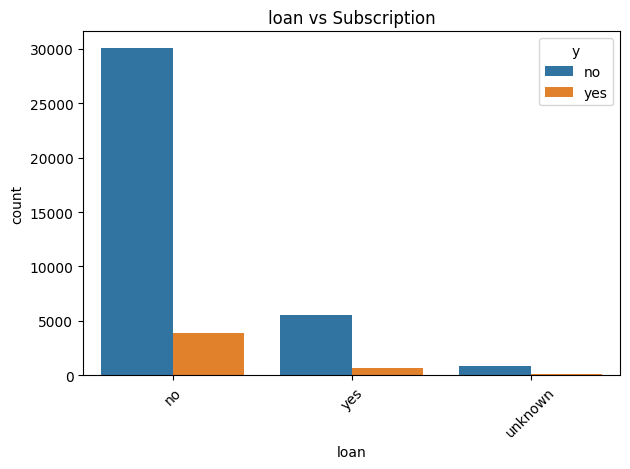

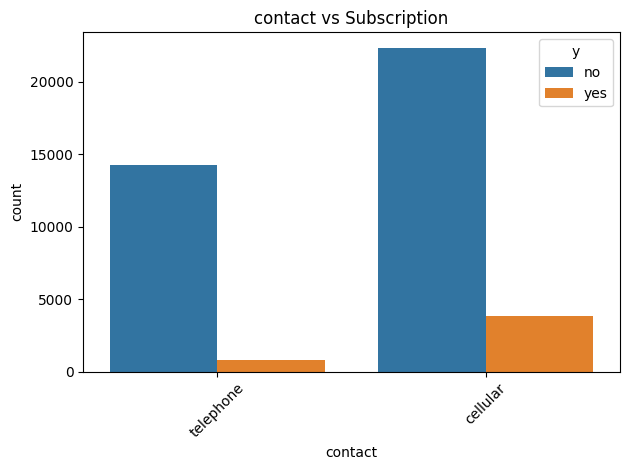

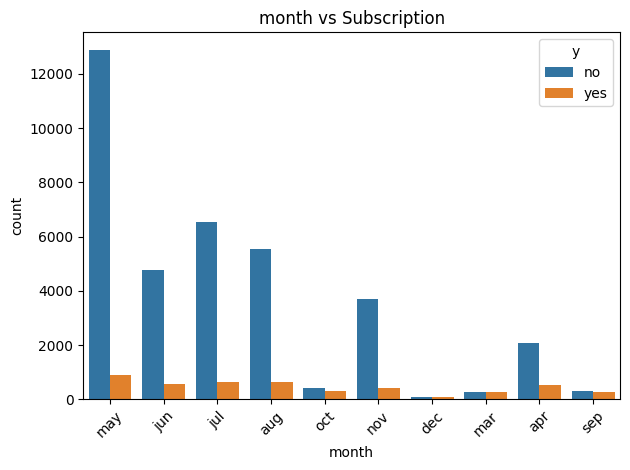

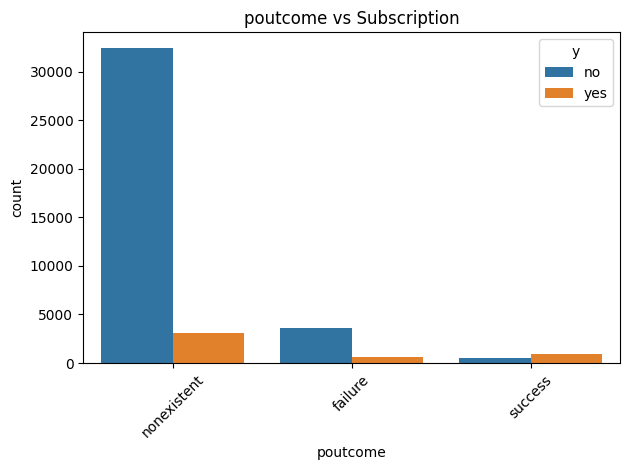

In [ ]:
# How categories relate to 'y'
for col in categorical_cols:
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"{col} vs Subscription")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

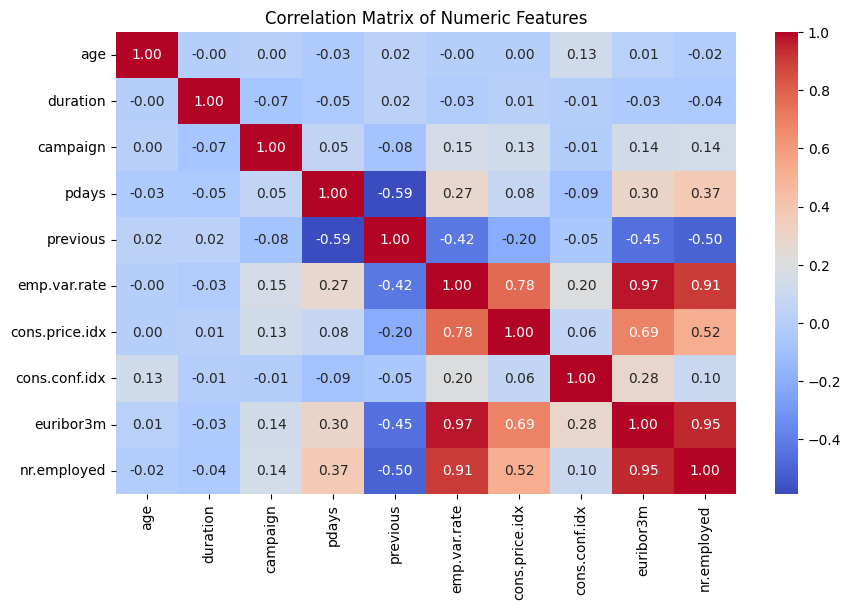

In [ ]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

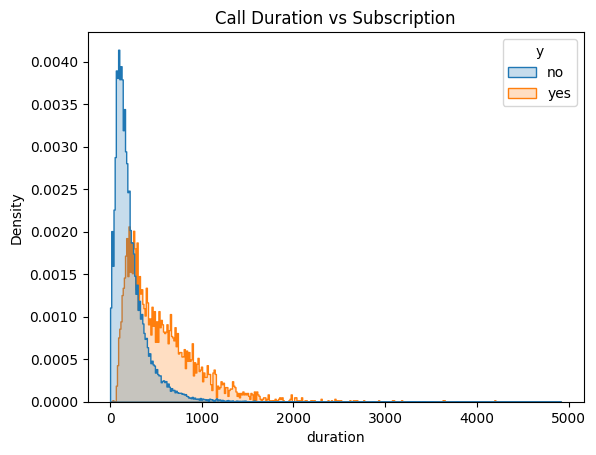

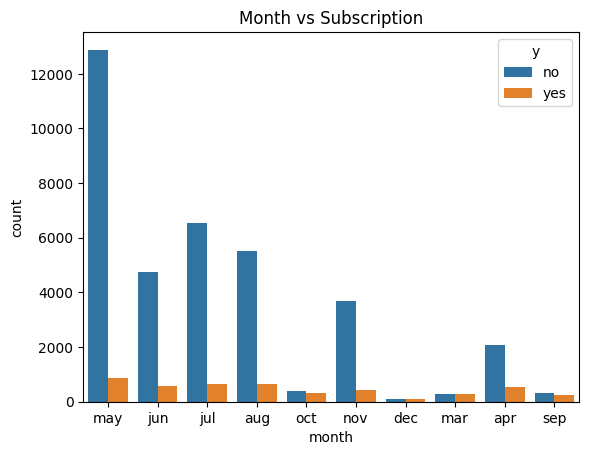

In [ ]:
# Duration vs Subscription
sns.histplot(data=df, x='duration', hue='y', element='step', stat='density', common_norm=False)
plt.title("Call Duration vs Subscription")
plt.show()

# Month vs Subscription
sns.countplot(x='month', hue='y', data=df)
plt.title("Month vs Subscription")
plt.show()

In [ ]:
# Check for imbalance in 'default', 'loan', etc.
for col in ['default', 'loan', 'housing']:
    print(f"{col} value counts:\n", df[col].value_counts(), '\n')

default value counts:
 default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

loan value counts:
 loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64 

housing value counts:
 housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 



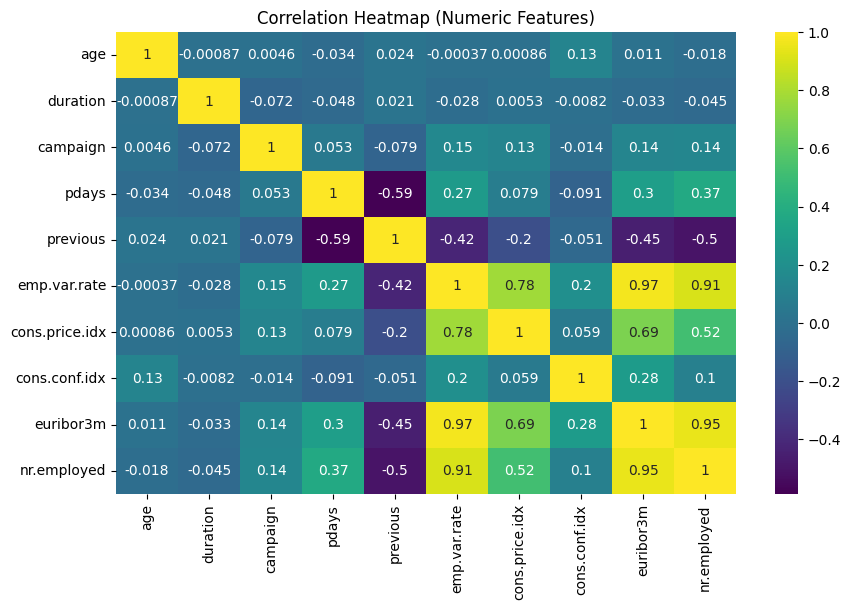

In [ ]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
num_col = df.select_dtypes(['int64','float64']).columns
cat_col = df.select_dtypes(['object']).columns

In [ ]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
def prop_plot_compare(df0, cols):
    for col in cols:
        counts_0 = df0[col].value_counts()
        fig, axes = plt.subplots(1, 1, figsize=(16, 8))

        axes.pie(counts_0, labels=counts_0.index, autopct='%1.1f%%', startangle=140)
        axes.set_title(f"Proportion of {col}")

        plt.show()


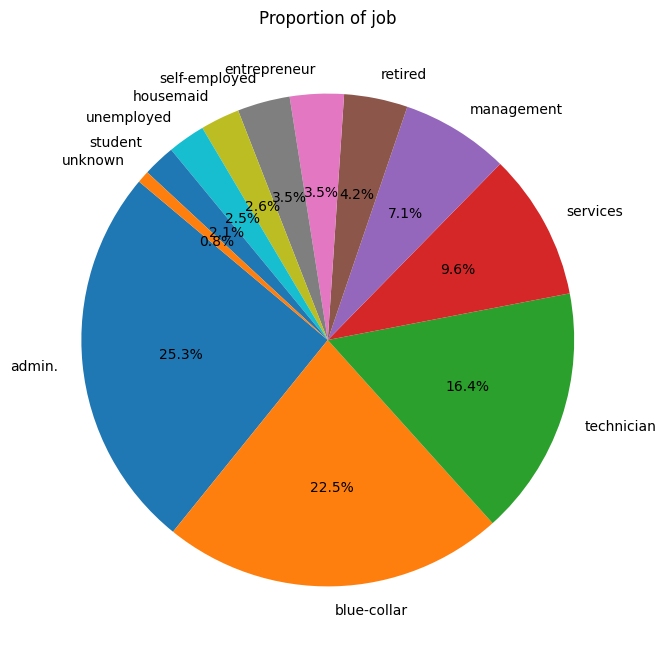

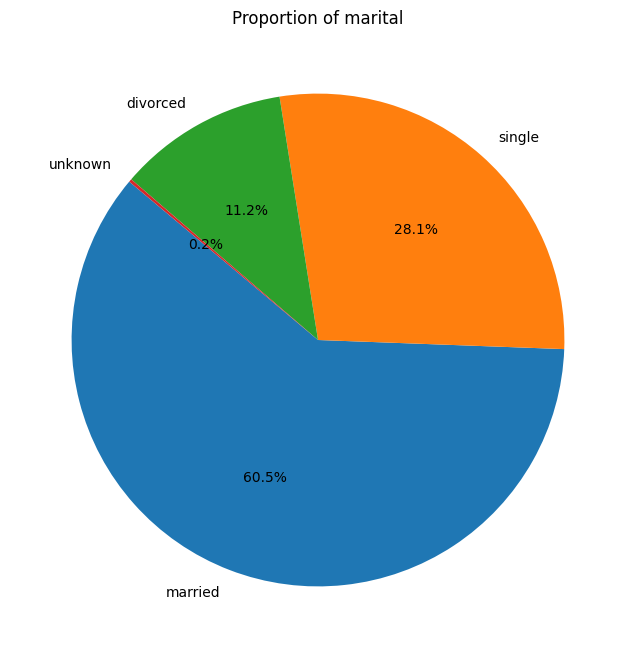

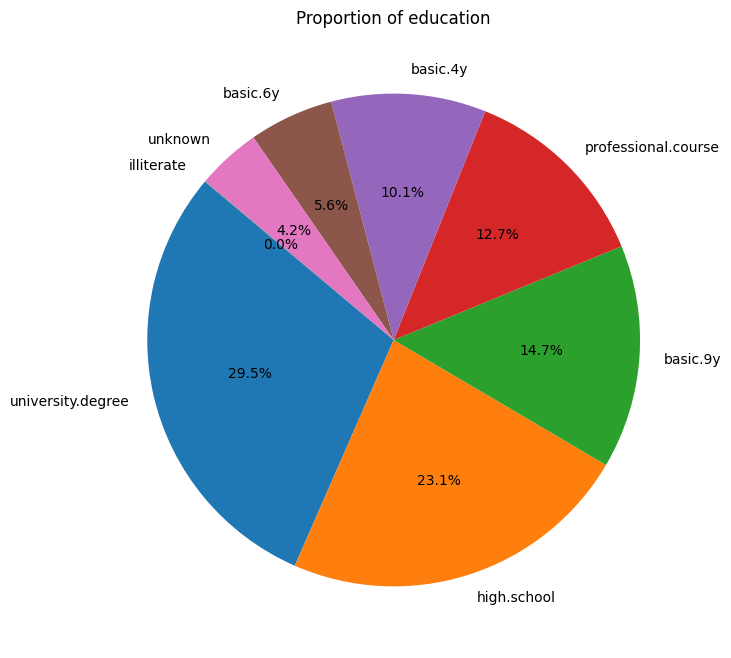

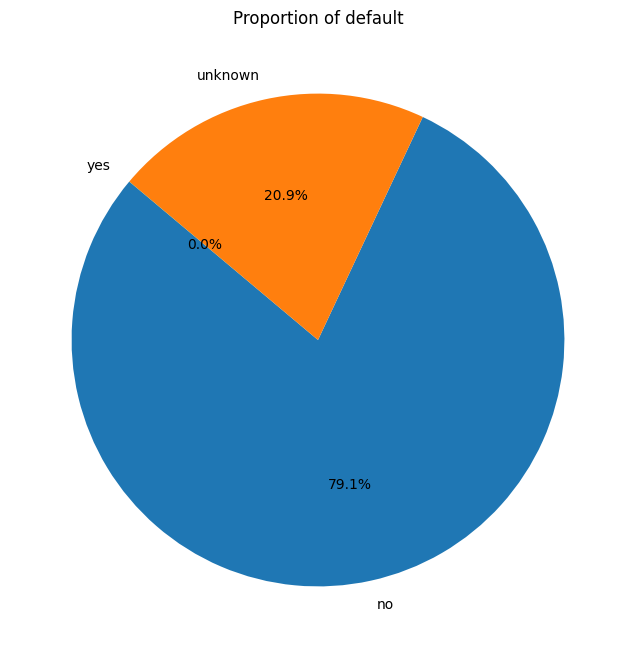

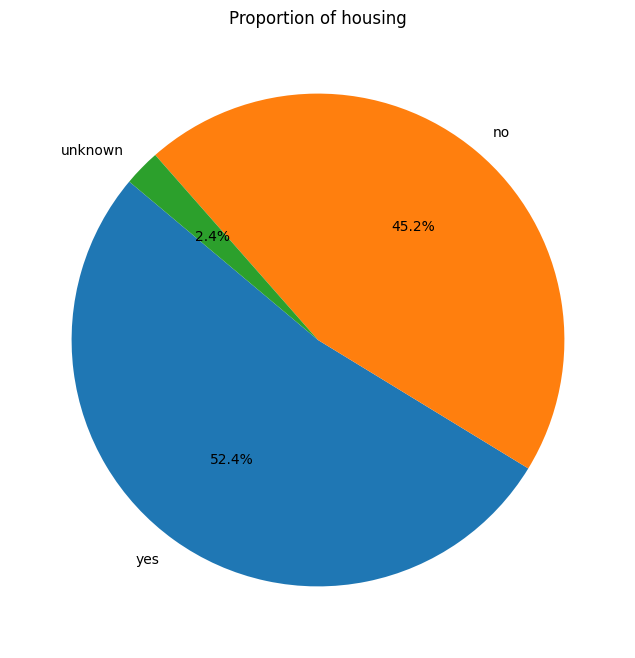

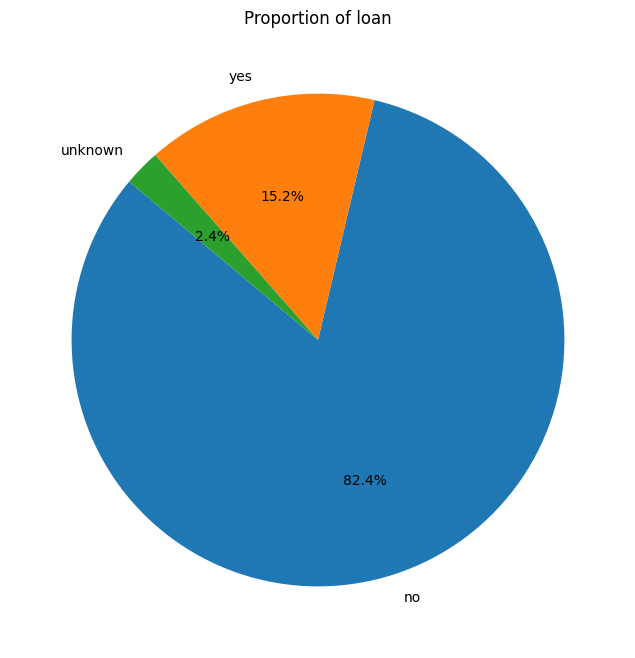

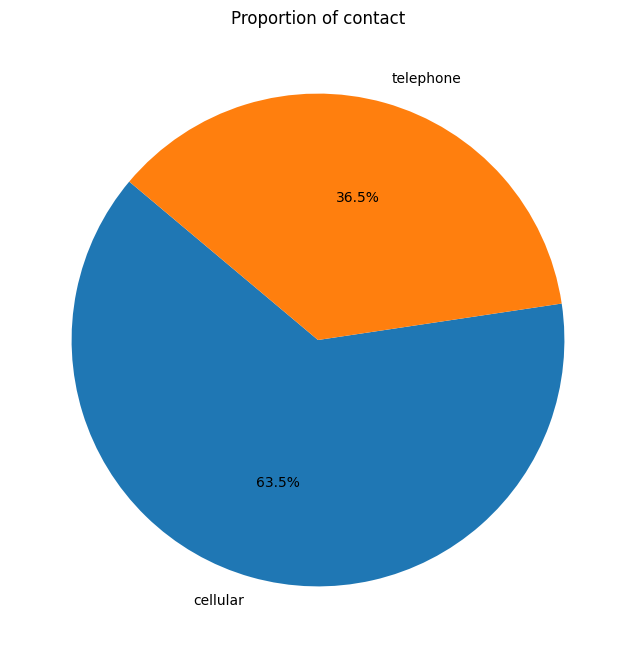

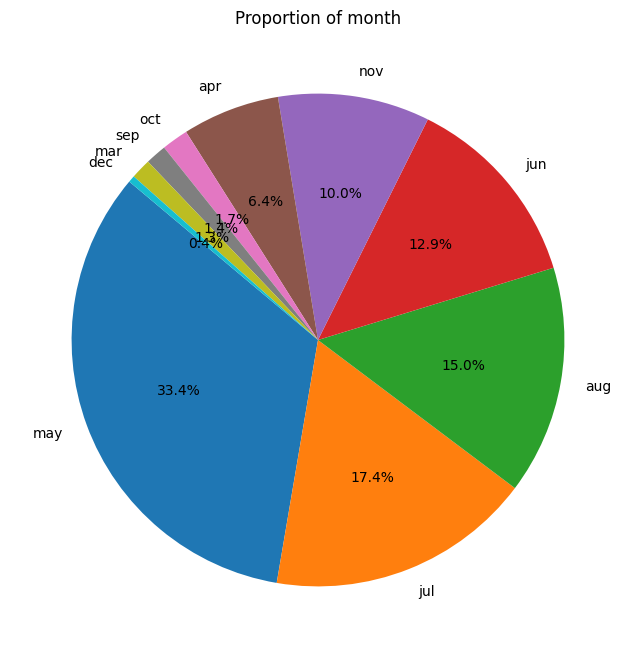

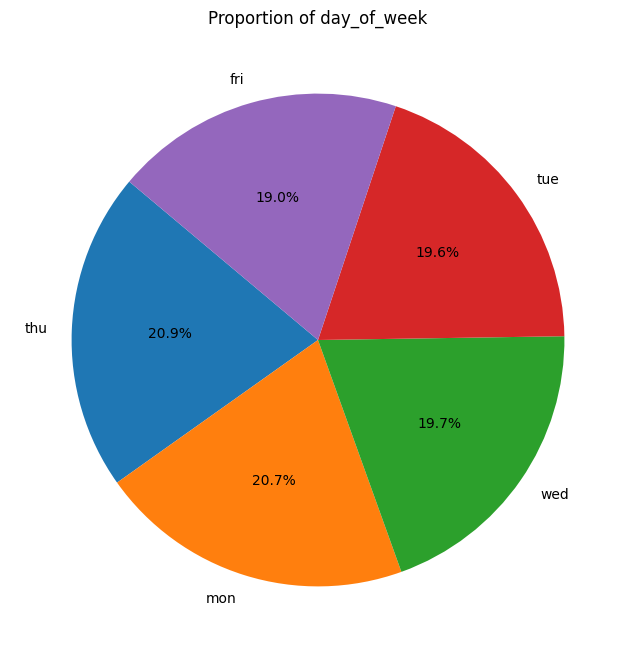

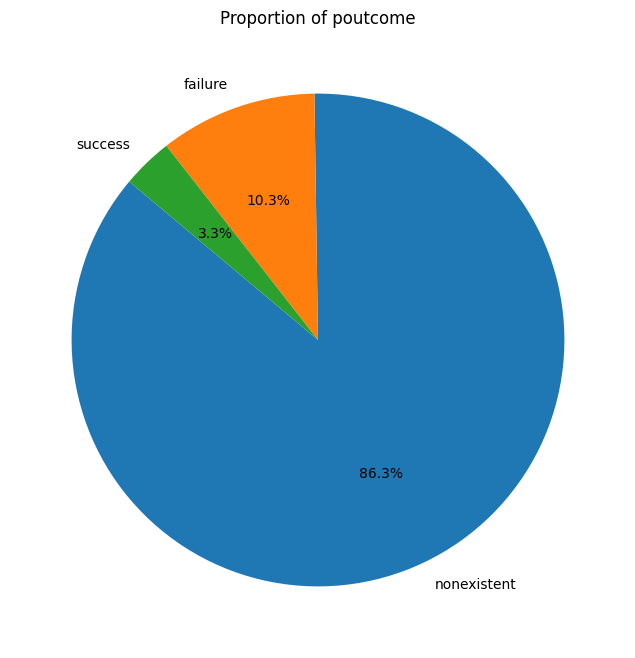

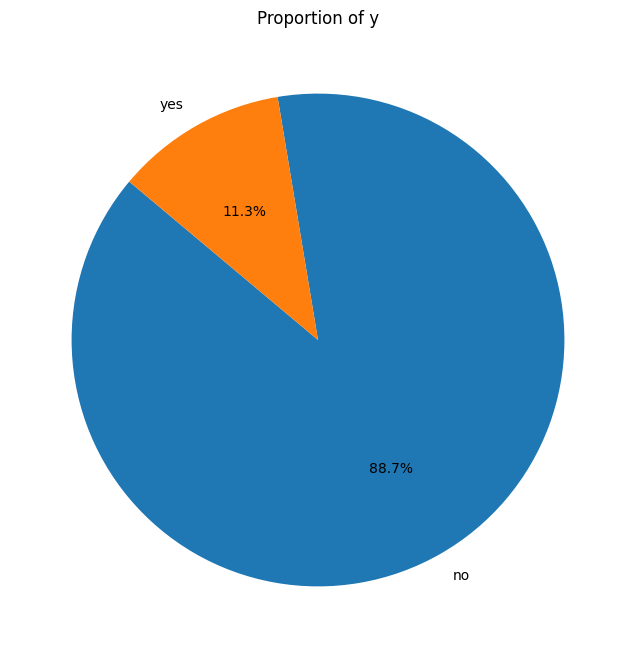

In [ ]:
prop_plot_compare(df,cat_col)

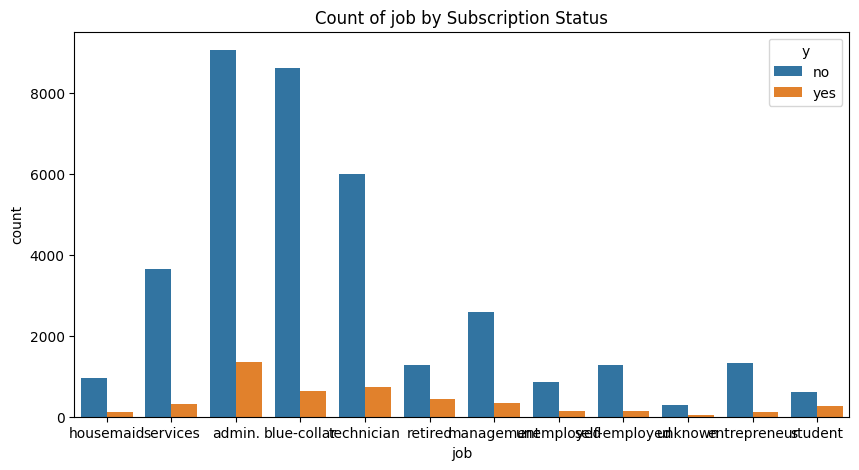

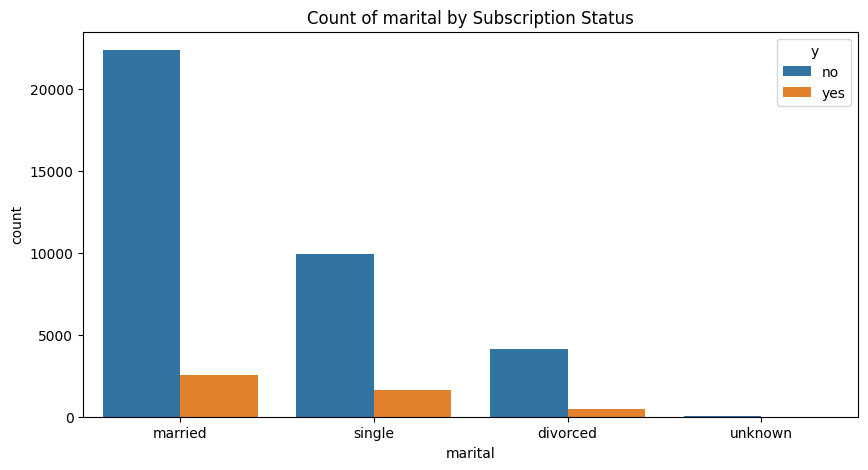

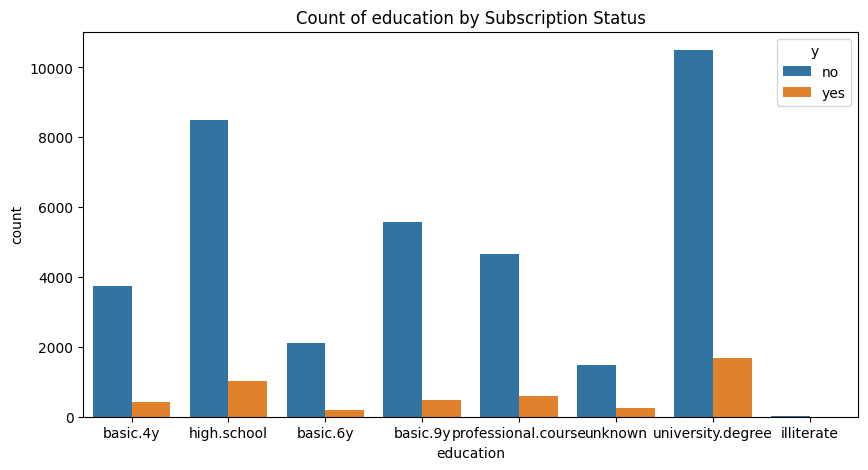

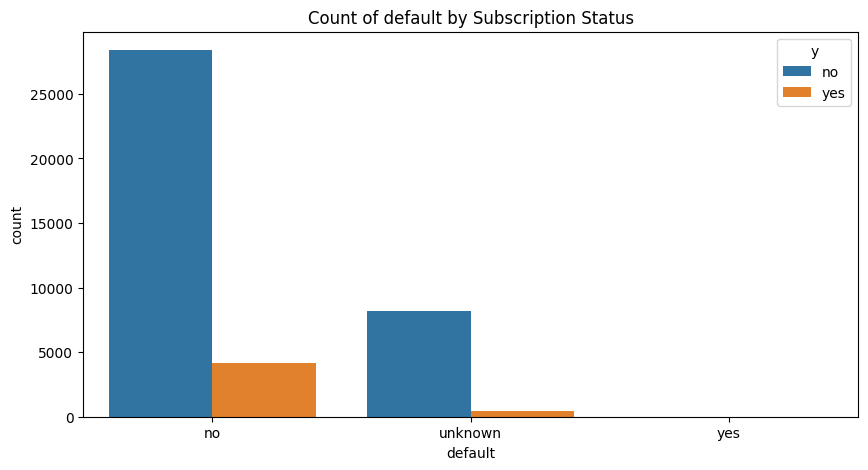

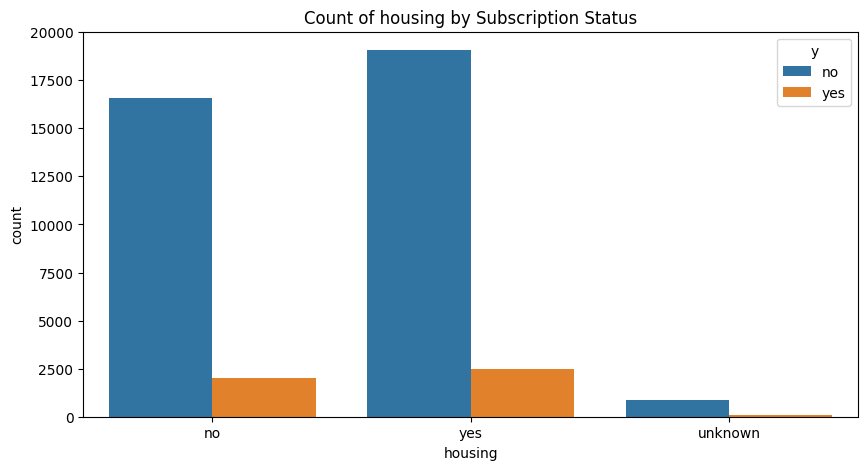

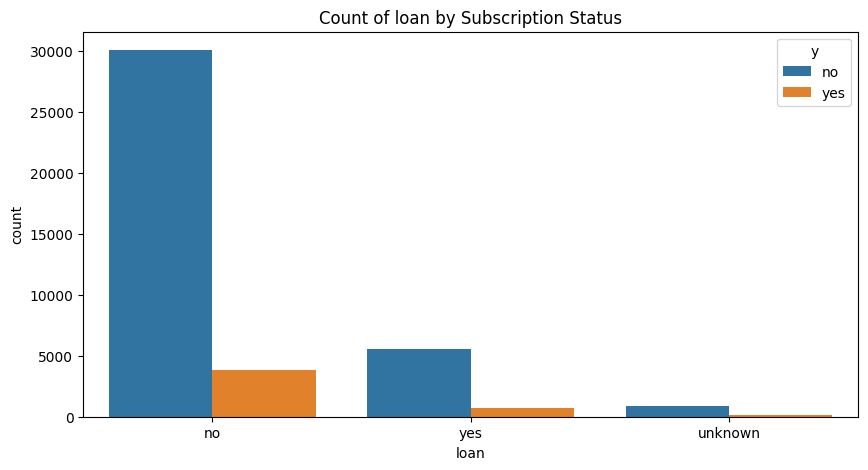

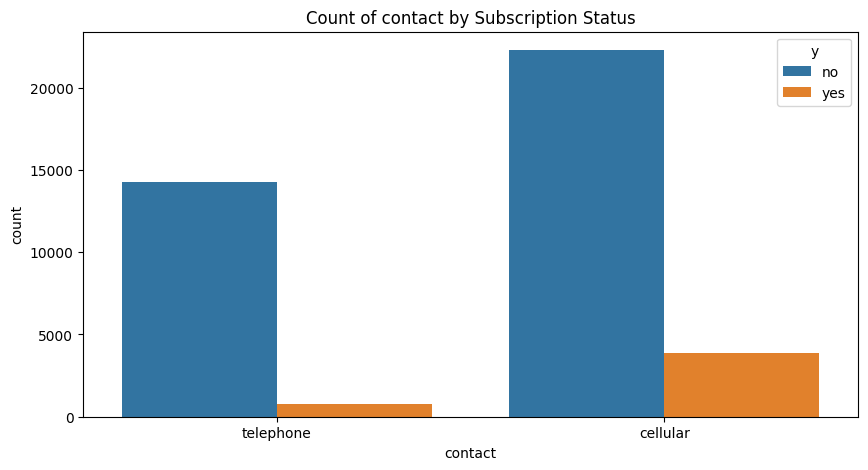

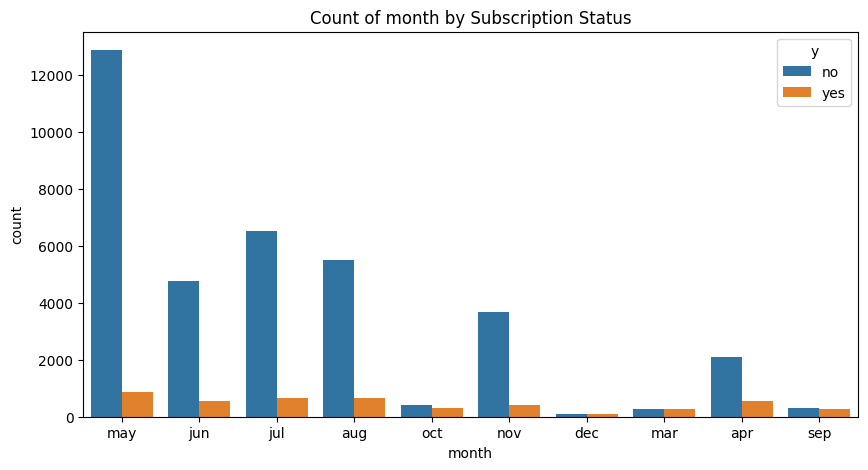

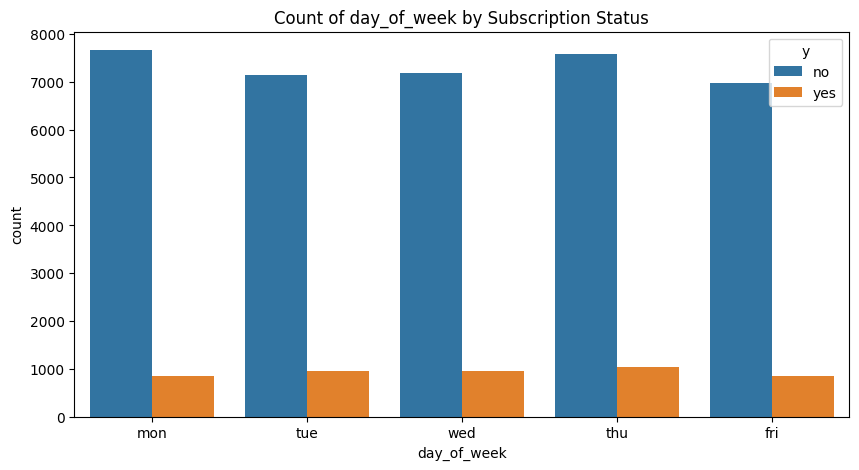

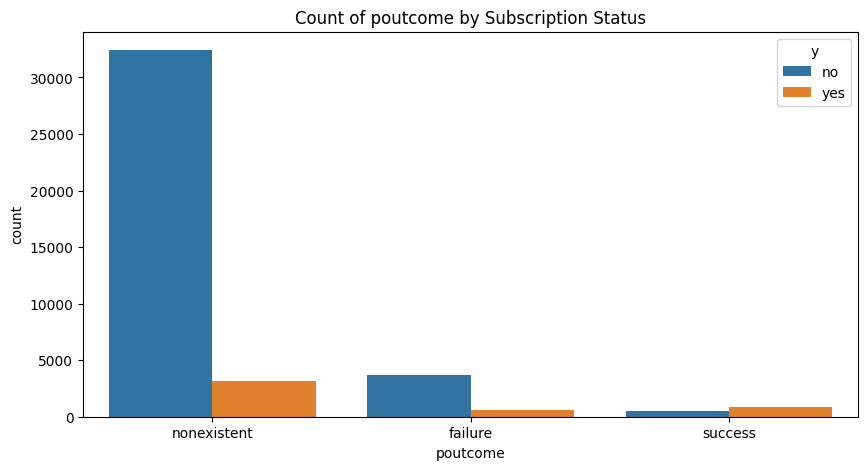

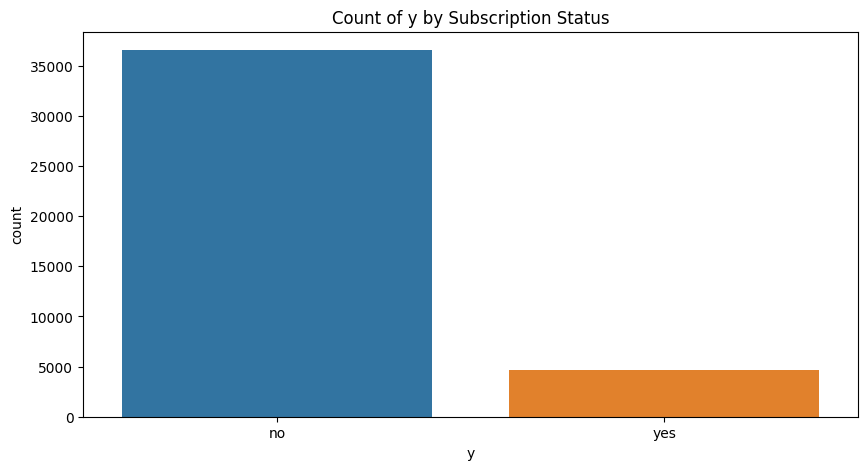

In [ ]:
for feature in cat_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='y')
    plt.title(f'Count of {feature} by Subscription Status')
    plt.show()

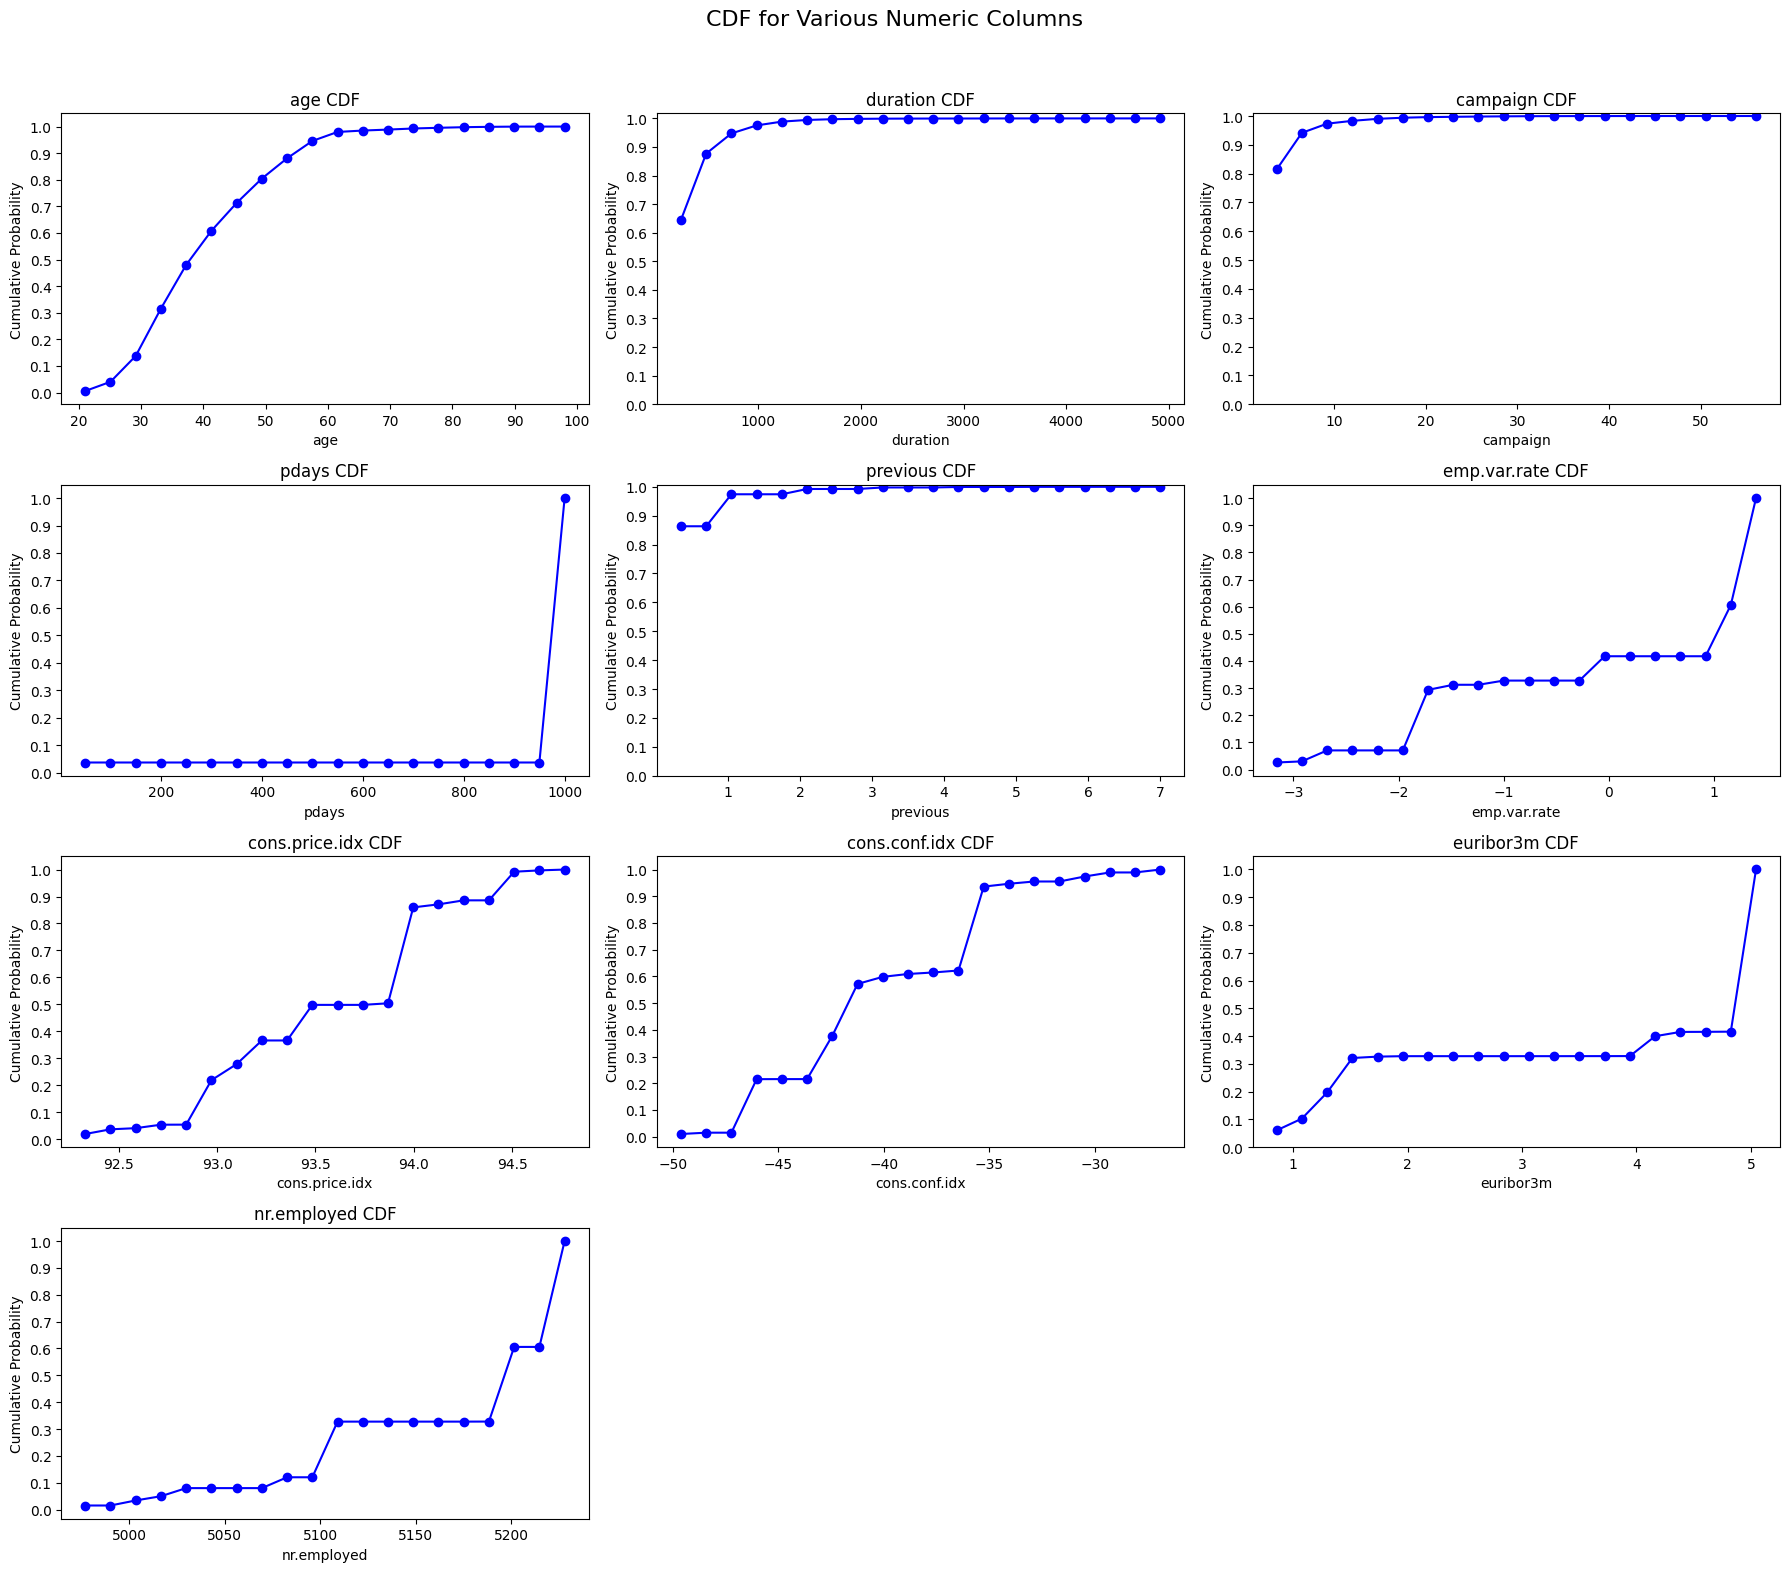

In [ ]:
int_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = 3
num_rows = (len(int_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 16), sharex=False, sharey=False)
fig.suptitle('CDF for Various Numeric Columns', fontsize=16)
for idx, column in enumerate(int_columns):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    counts, bins = np.histogram(df[column], bins=20, density=True)
    cdf = np.cumsum(counts)
    ax.plot(bins[1:], cdf / cdf[-1], color='blue', marker='o')
    ax.set_title(f'{column} CDF')
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xlabel(column)
    ax.set_ylabel('Cumulative Probability')

for idx in range(len(int_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])
    plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

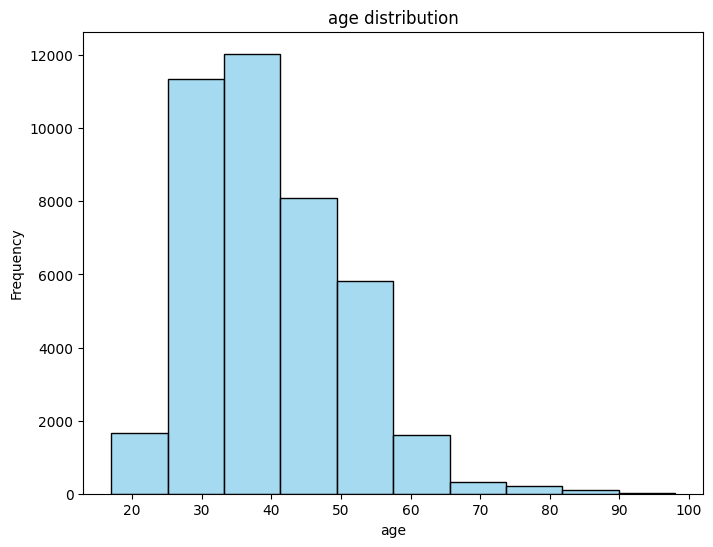

In [ ]:
import plotly.express as px
ages = df['age']

plt.figure(figsize=(8, 6))
sns.histplot(ages, bins=10, kde=False, color='skyblue')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

age_groups = ages.value_counts().sort_index()
fig = px.bar(x=age_groups.index, y=age_groups.values, labels={'x': 'Age', 'y': 'Frequency'}, title='Frequencies by Age Groups')
fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(age_groups.index), ticktext=list(age_groups.index)))
fig.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
fig_pie_housing = go.Figure(go.Pie(labels=df['housing'].value_counts().index, values=df['housing'].value_counts()))
fig_pie_loan = go.Figure(go.Pie(labels=df['loan'].value_counts().index, values=df['loan'].value_counts()))
fig_pie_cont = go.Figure(go.Pie(labels=df['contact'].value_counts().index, values=df['contact'].value_counts()))
fig_pie_pou = go.Figure(go.Pie(labels=df['poutcome'].value_counts().index, values=df['poutcome'].value_counts()))

fig = make_subplots(rows=2, cols=2, subplot_titles=['Housing Distribution', 'Loan Distribution', 'Contact Distribution', 'Poutcome Distribution'],
                   specs=[[{'type': 'pie'}, {'type': 'pie'}],[{'type': 'pie'},{'type': 'pie'}]])

fig.add_trace(fig_pie_housing['data'][0], row=1, col=1)
fig.add_trace(fig_pie_loan['data'][0], row=1, col=2)
fig.add_trace(fig_pie_cont['data'][0], row=2, col=1)
fig.add_trace(fig_pie_pou['data'][0], row=2, col=2)

fig.update_layout(height=800, width=1000, title_text='Distributions', showlegend=False)
fig.show()

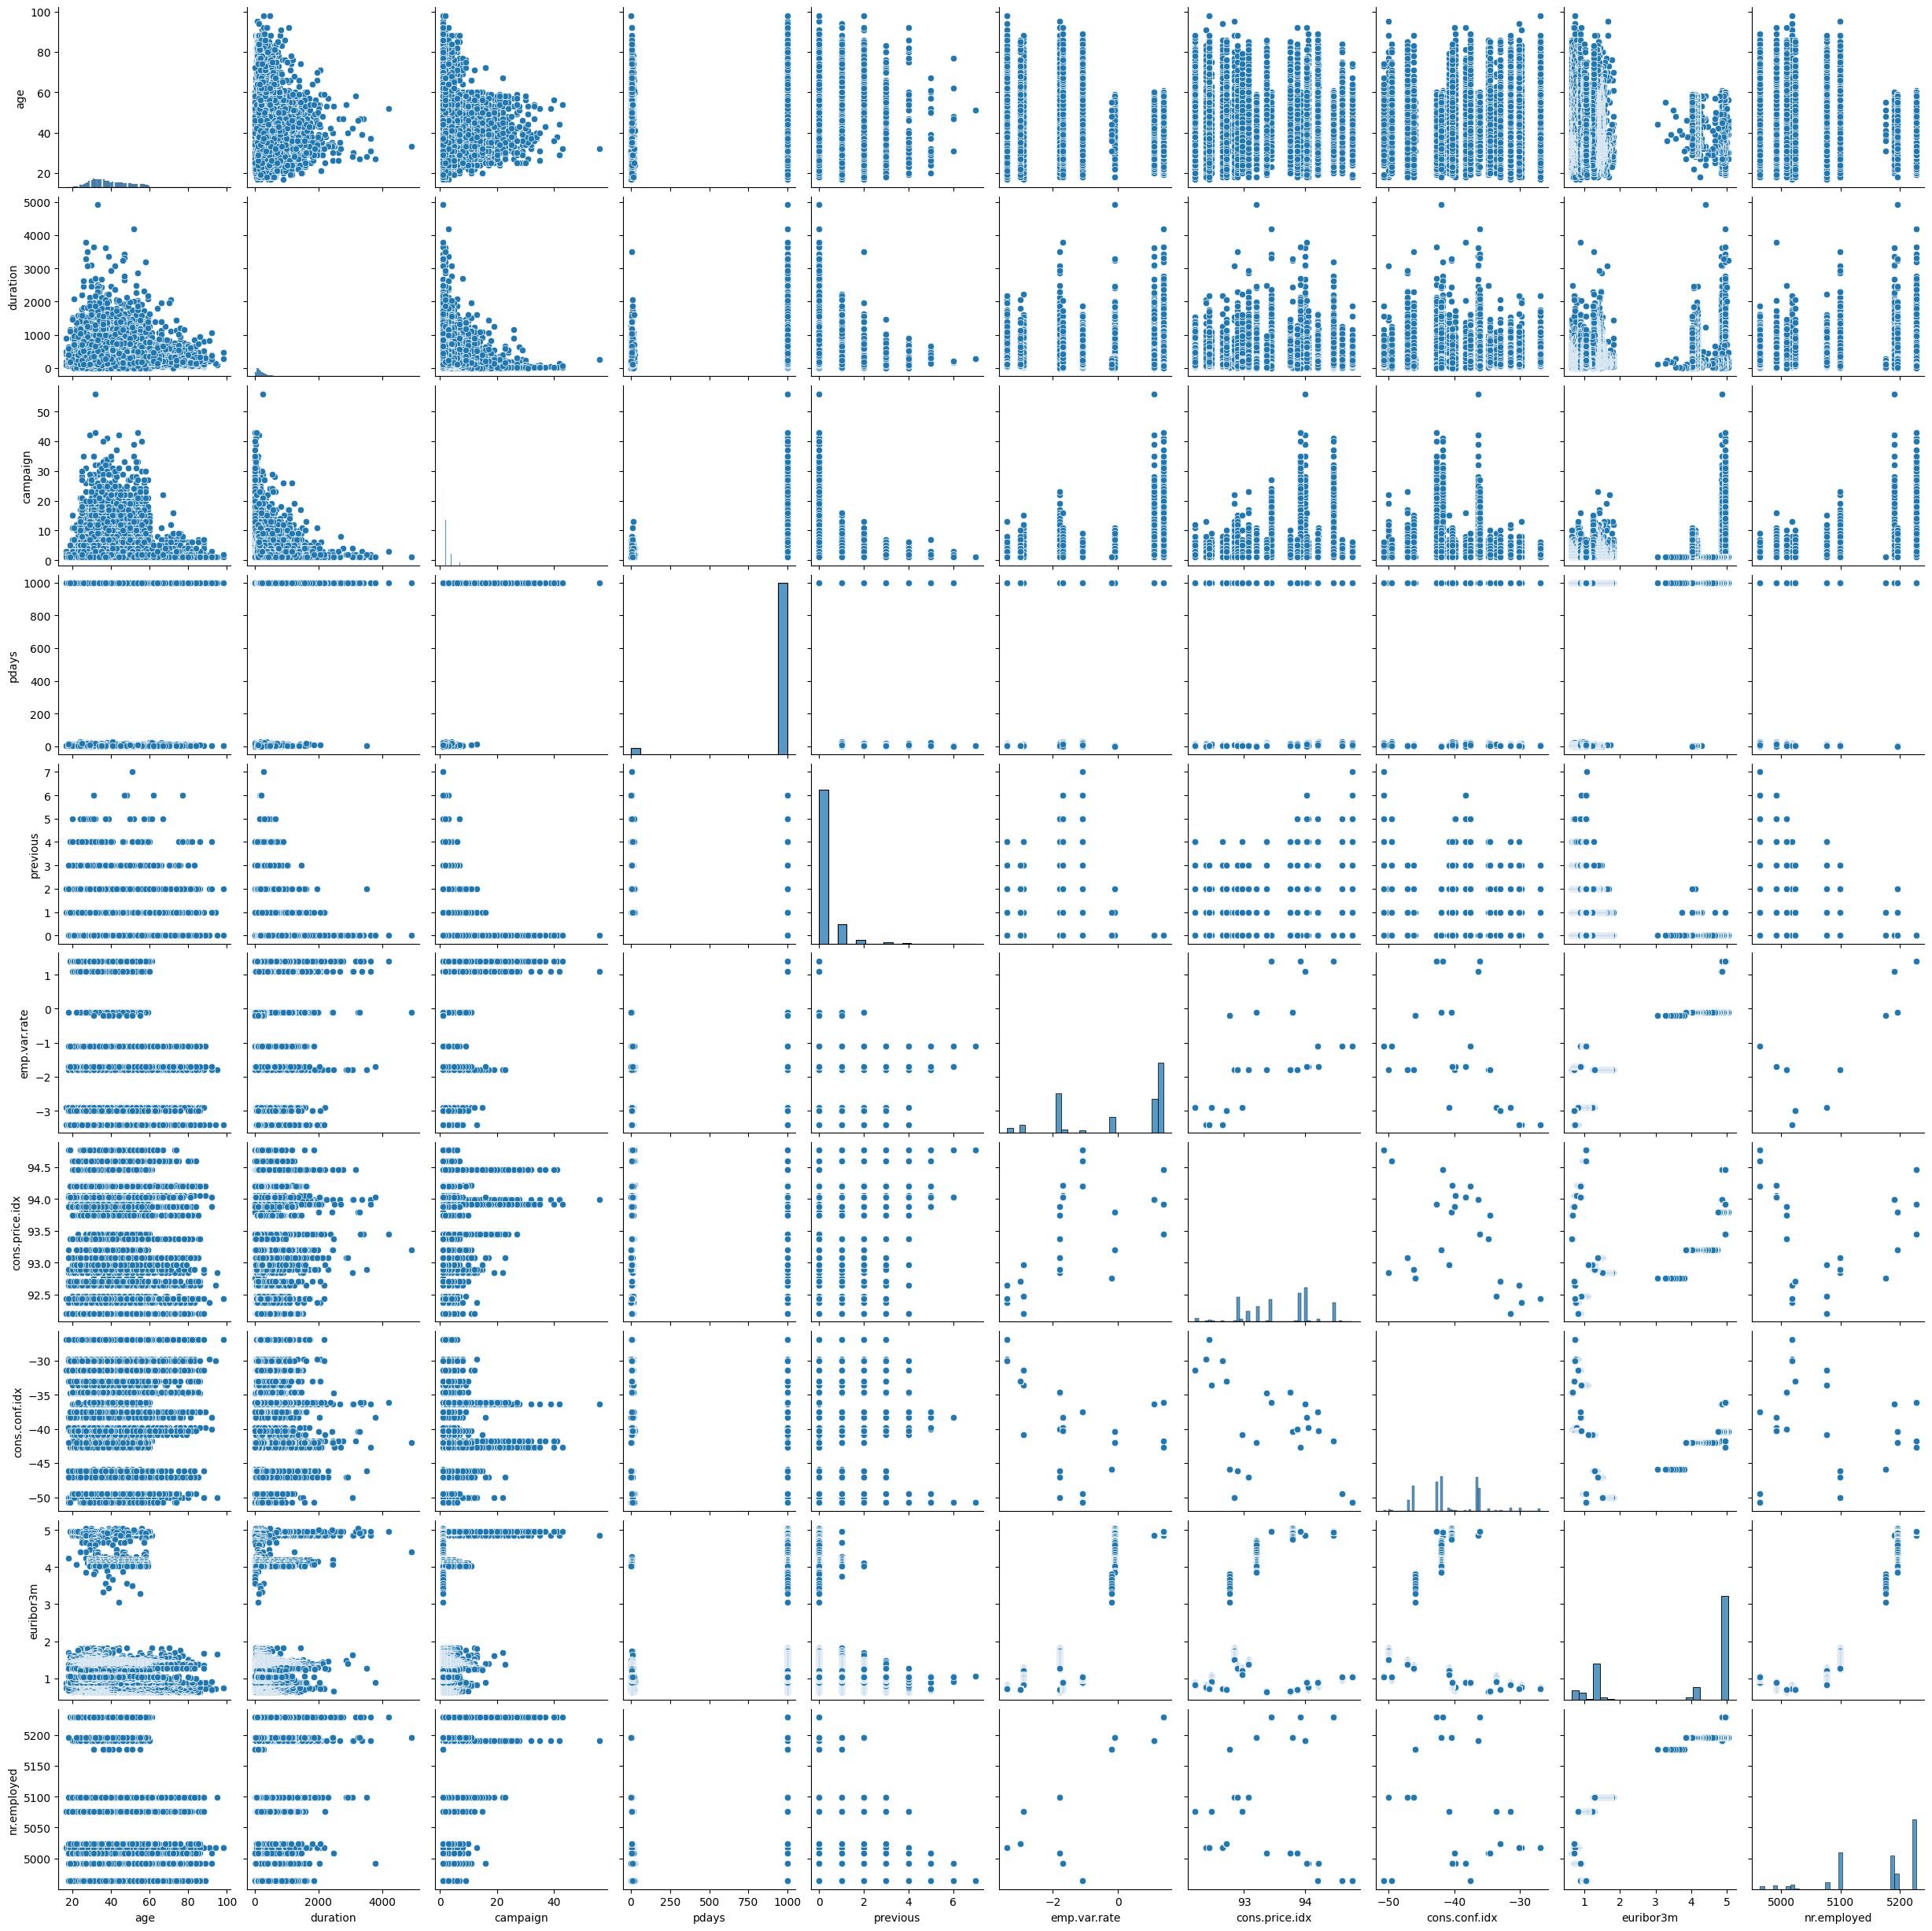

In [8]:
import seaborn as sns

sns.pairplot(df)